In [224]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [225]:
digits = tf.keras.datasets.mnist

In [226]:
(train_data,train_labels),(test_data,test_labels) = digits.load_data()

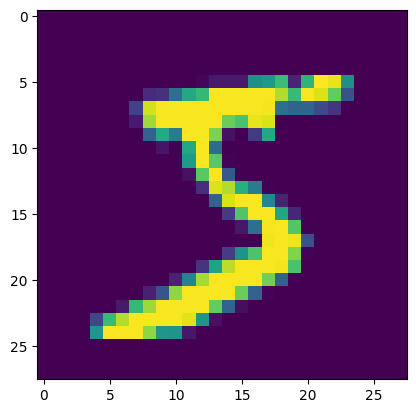

In [227]:
plt.imshow(train_data[0])
plt.show()

In [228]:
train_data.shape

(60000, 28, 28)

In [229]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Rescaling(1/255),
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=32),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=10,activation='softmax')
    ])
    model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # sparse_categorical_crossentropy
    return model

In [230]:
model = create_model()

In [231]:
import json
import os

In [232]:
class LogDetails(tf.keras.callbacks.Callback):
    def __init__(self,log_file):
        self.log_file = log_file
        self.epoch_data = []
        if os.path.exists(log_file):
            with open(log_file, "r") as f:
                self.logs_data = json.load(f)
        else:
            self.logs_data = []
    def on_epoch_end(self,epoch,logs=None):
        logs = logs or {}
        epochs = {'epochs':epoch + 1, **logs}
        self.epoch_data.append(epochs)
    def on_train_end(self,logs=None):
        self.logs_data.append(self.epoch_data)
        with open(self.log_file,'w') as file:
            json.dump(self.logs_data,file,indent=4)
        print(f"Trainng logs saved into {self.log_file}")


In [233]:
logger = LogDetails('logs.json')

In [234]:
history = model.fit(train_data,train_labels,epochs=5,validation_split=0.2,batch_size=64,callbacks=[logger])

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5299 - loss: 1.5038 - val_accuracy: 0.9440 - val_loss: 0.4122
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8252 - loss: 0.6743 - val_accuracy: 0.9643 - val_loss: 0.1909
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8709 - loss: 0.4777 - val_accuracy: 0.9692 - val_loss: 0.1361
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8959 - loss: 0.3778 - val_accuracy: 0.9718 - val_loss: 0.1162
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9095 - loss: 0.3320 - val_accuracy: 0.9762 - val_loss: 0.0928
Trainng logs saved into logs.json


In [240]:
with open('logs.json','r') as file:
    logs_data = file.read()

In [245]:
data = json.loads(logs_data)

In [258]:
runs = []
val_loss = []
val_acc = []
train_acc = []
train_loss = []
i = 0
for epo in data:
    i+=1
    runs.append(i)
    val_loss.append(epo[-1]['val_loss'])
    val_acc.append(epo[-1]['val_accuracy'])
    train_acc.append(epo[-1]['accuracy'])
    train_loss.append(epo[-1]['loss'])

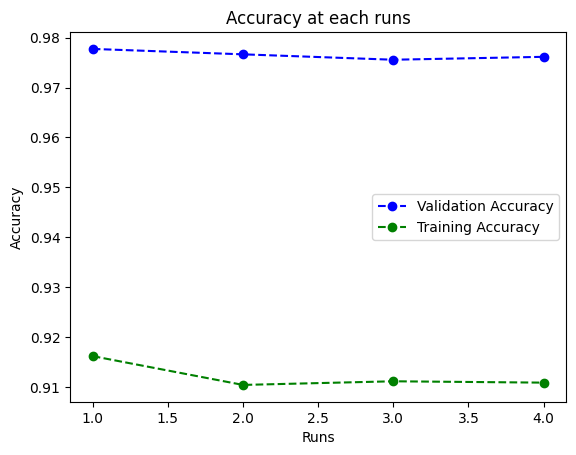

In [ ]:
plt.title('Accuracy at each runs')
plt.plot(runs,val_acc,label='Validation Accuracy', color='blue', marker='o', linestyle='--')
plt.plot(runs,train_acc,label='Training Accuracy', color='green', marker='o', linestyle='--')
plt.xlabel('Runs')
plt.ylabel('Accuracy')
plt.legend(loc='best', fontsize=10)
plt.show()

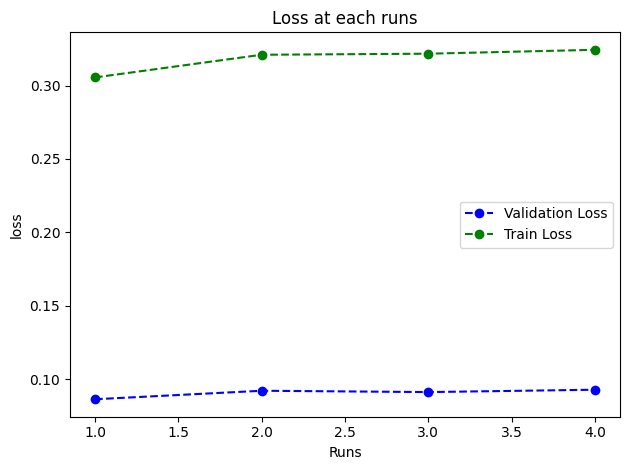

In [278]:
plt.title('Loss at each runs')
plt.plot(runs,val_loss,label='Validation Loss', color='blue', marker='o', linestyle='--')
plt.plot(runs,train_loss,label='Train Loss', color='green', marker='o', linestyle='--')
plt.xlabel('Runs')
plt.ylabel('loss')
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()